In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

In [ ]:
print(df.head())  # First 5 rows
print(df.info())  # Data types and missing values
print(df.describe())  # Stats for numerical columns
print(df['Churn'].value_counts())  # Churn distribution (e.g., ~73% No, 27% Yes)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Convert TotalCharges to numeric (some are empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Check for missing values
print(df.isnull().sum())  # Should be 0 now

# Drop irrelevant column
df.drop('customerID', axis=1, inplace=True)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-2157510668.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
# Convert Yes/No to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encode multi-category columns (e.g., Contract becomes Contract_Month-to-month, etc.)
df = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [ ]:
# Tenure groups (e.g., short-term vs. long-term)
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 36, 72], labels=['Short', 'Medium', 'Long'])

# One-hot encode the new feature
df = pd.get_dummies(df, columns=['TenureGroup'], drop_first=True)

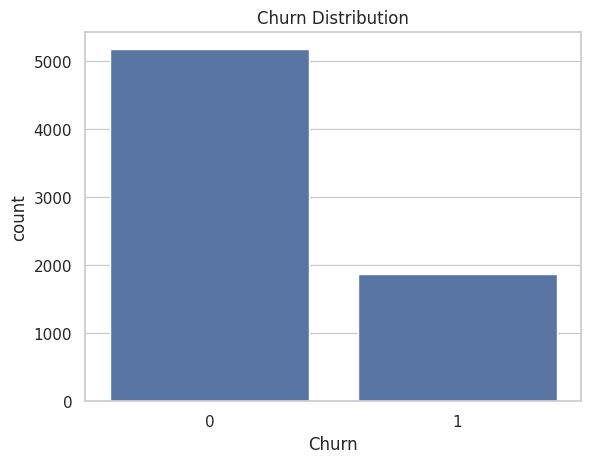

In [ ]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

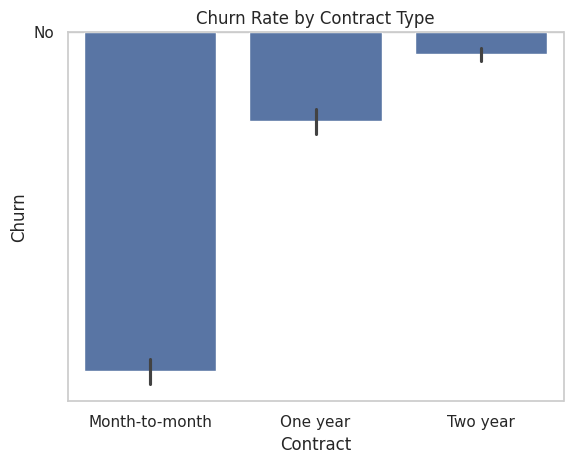

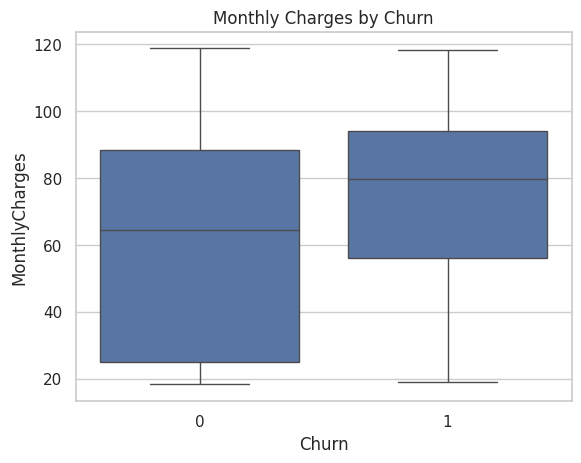

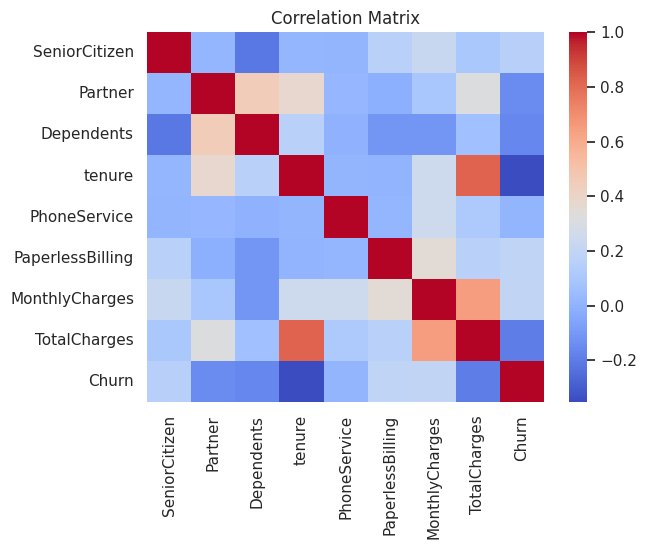

In [ ]:
# Churn by contract type (using original data for viz, before encoding)
original_df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')  # Reload for viz
sns.barplot(x='Contract', y='Churn', data=original_df)
plt.title('Churn Rate by Contract Type')
plt.show()

# Monthly charges vs. churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

# Correlation heatmap (numerical features)
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ... (your existing code up to here: fixing TotalCharges, dropping customerID, mapping binaries, one-hot encoding)

# Encode remaining categorical columns (these are Yes/No/No internet service types)
remaining_cats = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in remaining_cats:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})  # Map to 0/1; treat "No service" as 0

# Verify no strings left (optional check)
print(df.dtypes)  # All should be int/float now
print(df.select_dtypes(include=['object']).columns)  # Should be empty

# ... (now proceed to feature engineering, EDA, and modeling)

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [ ]:
model = LogisticRegression(max_iter=1000)  # Increase iterations for convergence
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy and report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')  # ~0.80
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.81
[[934 102]
 [163 210]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [ ]:
# Coefficients from model
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance.head(10))  # Top drivers

                           Feature  Importance
16     InternetService_Fiber optic    0.548070
24                TenureGroup_Long    0.503569
12                PaperlessBilling    0.341021
21  PaymentMethod_Electronic check    0.312127
5                    MultipleLines    0.235871
11                 StreamingMovies    0.201599
0                    SeniorCitizen    0.188671
10                     StreamingTV    0.091684
1                          Partner    0.082105
13                  MonthlyCharges    0.010349
